In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

from keras.datasets import mnist

import numpy as np

from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns

Load the mnist training and test data sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display the first five images and the labels

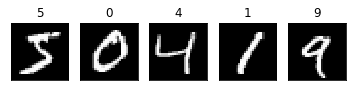

In [3]:
def plot_gray_image(img, title, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img, cmap=cm.gray)
    ax.set_title(title)
    
fig, ax_list = plt.subplots(nrows=1, ncols=5)
for idx, ax in enumerate(ax_list):
    plot_gray_image(X_train[idx], y_train[idx], ax)

Flatten the two dimensional input data and center it around zero

In [4]:
img_size = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape(-1, img_size)
X_test_flat = X_test.reshape(-1, img_size)

X_train_flat = X_train_flat/255
X_test_flat = X_test_flat/255

In [6]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [8]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train_flat, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_flat, y_test_cat))
score = model.evaluate(X_test_flat, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.2469 - acc: 0.9251 - val_loss: 0.1141 - val_acc: 0.9633
Epoch 2/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.1024 - acc: 0.9690 - val_loss: 0.0919 - val_acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0758 - acc: 0.9776 - val_loss: 0.0727 - val_acc: 0.9791
Epoch 4/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0600 - acc: 0.9826 - val_loss: 0.0695 - val_acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0510 - acc: 0.9851 - val_loss: 0.0654 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0793 - val_acc: 0.9804
Epoch 7/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0390 - acc: 0.9886 - val_loss: 0.

In [11]:
y_predict = model.predict_classes(X_test_flat)

10000/10000 [==============================] - 1s 113us/step


In [12]:
err_idx = np.where(y_test != y_predict)[0]

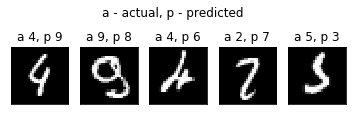

In [49]:
err_plot_size = 5
fig, ax_list = plt.subplots(nrows=1, ncols=err_plot_size)
fig.set_size_inches(w=6, h=2)
fig.suptitle('a - actual, p - predicted')
for idx, ax in enumerate(ax_list):
    data_idx = err_idx[idx]
    msg = 'a {}, p {}'.format(y_test[data_idx], y_predict[data_idx])
    plot_gray_image(X_test[data_idx], msg, ax)

In [53]:
cmatrix = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cmatrix)
df_cm

,0,1,2,3,4,5,6,7,8,9
0,968,1,2,0,1,1,4,1,1,1
1,0,1128,2,0,0,0,1,1,3,0
2,2,1,1012,4,1,0,2,8,2,0
3,1,0,3,990,0,6,0,3,3,4
4,3,0,1,0,948,0,6,4,2,18
5,2,0,0,5,1,871,7,0,4,2
6,1,3,0,1,3,2,947,0,1,0
7,2,3,8,0,0,0,0,1006,2,7
8,2,1,6,5,3,3,2,4,944,4
9,0,2,0,3,7,3,0,3,2,989


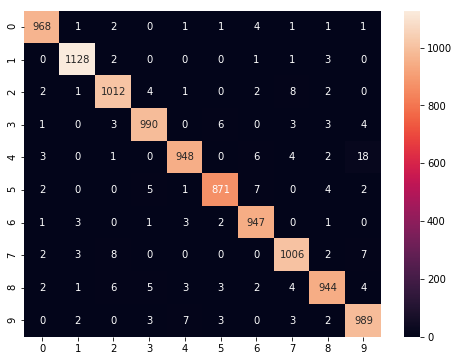

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='.0f', ax=ax)